This notebook aims to get a basic understanding of the given data; importing it, working with it, and graphing etc...

In [8]:
# Imports
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation, FFMpegWriter

%matplotlib inline

%cd ..

from src.data_handling import *

%cd -

c:\Users\nicis\OneDrive - UNSW\RedbackNMP
c:\Users\nicis\OneDrive - UNSW\RedbackNMP\redback_ds_nmp


The data folders seem to be split into 2 `.csv`'s, `input_params` and `output`. `input_params` seems to be the setup of the car in this particular run. `output` seems to be the logging data, however at this stage I don't really know

In [2]:
# Accessing Data
data_file_path = "../data/raw/data0_07"
# df_input = pd.read_csv(f"{data_file_path}/input_params.csv", header = None, index_col = 0, squeeze = True)
df_input = pd.read_csv(f"{data_file_path}/input_params.csv")
df_output = pd.read_csv(f"{data_file_path}/output.csv")

In [5]:
###

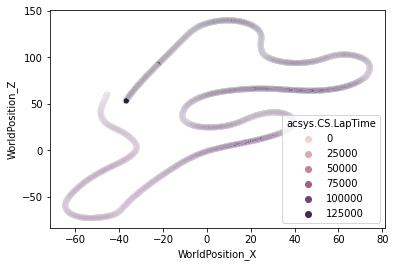

In [6]:
# Assuming 15 laps (up to 14)
n_laps = 1
n_segments = 5

sns.color_palette("tab10")

# for i in range(n_laps):
#     print(f'PLOT {i}')
#     # df_output[df_output["acsys.CS.LapCount"]==i].plot(x="WorldPosition_X", y="WorldPosition_Z", c=[1,2,3])

#     data = df_output[df_output["acsys.CS.LapCount"]==i]
#     segment = int(len(data.index) / n_segments)

#     for j in range(n_segments):
#         sns.scatterplot(x="WorldPosition_X", y="WorldPosition_Z", hue="acsys.CS.LapTime", data=data[segment*j:segment*(j+1)])
#         plt.show()

for i in range(n_laps):
    data = df_output[df_output["acsys.CS.LapCount"]==i]
    # (data["acsys.CS.LapTime"] - data["acsys.CS.LapTime"].shift(1)).plot()
    sns.scatterplot(x="WorldPosition_X", y="WorldPosition_Z", hue="acsys.CS.LapTime", data=data)
    plt.show()

From the above, we can see that plotting x vs z gives us a map

PLOT 0


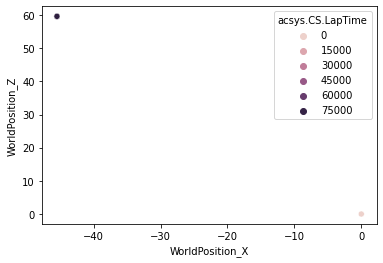

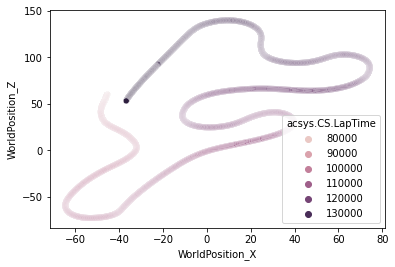

In [8]:
# SECTORS: look at later

# Assuming 15 laps (up to 14)
n_laps = 1
n_segments = 2

sns.color_palette("tab10")

for i in range(n_laps):
    print(f'PLOT {i}')
    # df_output[df_output["acsys.CS.LapCount"]==i].plot(x="WorldPosition_X", y="WorldPosition_Z", c=[1,2,3])

    data = df_output[df_output["acsys.CS.LapCount"]==i]
    segment = int(len(data.index) / n_segments)

    for j in range(n_segments):
        sns.scatterplot(x="WorldPosition_X", y="WorldPosition_Z", hue="acsys.CS.LapTime", data=data[segment*j:segment*(j+1)])
        plt.show()

To develop anything meaningful, we can first see if any data points have correlation

100%|██████████| 10/10 [02:01<00:00, 12.14s/it]


<AxesSubplot:xlabel='acsys.CS.LapCount'>

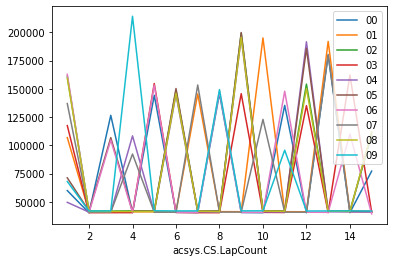

In [63]:
#df_output["acsys.CS.LapTime"]    49071

lap_times = pd.DataFrame()

for i in tqdm(range(10)):
    df = pd.read_csv(f"../data/raw/data0_{i:02}/output.csv")
    df = df[["acsys.CS.LapCount", "acsys.CS.LapTime"]][df["acsys.CS.LapCount"].diff().shift(-1).fillna(1) == 1].set_index("acsys.CS.LapCount").iloc[:,0]
    df.index += 1
    lap_times[f"{i:02}"] = df

lap_times.plot()

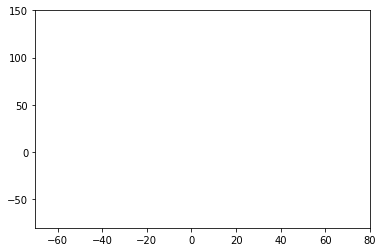

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(-70, 80), ylim=(-80, 150))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(df_output['WorldPosition_X', i+300], df_output['WorldPosition_Y', i+300])
    return line,

anim = FuncAnimation(fig, animate, frames=10000, init_func=init, interval=100, blit=True)

plt.show()

PermissionError: [WinError 5] Access is denied

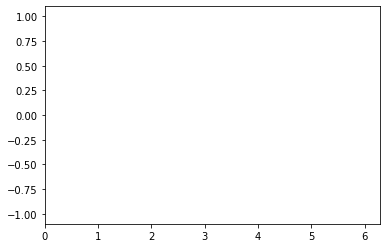

In [6]:
plt.rcParams['animation.ffmpeg_path'] = "C:\\test"
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line,

b = FFMpegWriter()
anim = FuncAnimation(fig, animate)
anim.save("animation.mp4", writer = b)
# plt.show()